In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:

class NaiveBayes:
    
    def fit(self,X,y,prior=None):
        self.prior = prior
        self.classes = y.unique()
        self.mean = pd.DataFrame(columns=X.columns,index=np.unique(y))
        self.var = pd.DataFrame(columns=X.columns,index=np.unique(y))
        for i in X.columns:
            for j in self.classes:
                self.var.loc[j,i] = np.var(X[y==j][i])
                self.mean.loc[j,i] = np.mean(X[y==j][i])
                
        if not self.prior:  
            self.prior = {}
            for i in self.classes:
                self.prior[i] = round(((y[y==i].shape[0])/(y.shape[0])),2)
            
    def pdf(self,x,column,cls):
        num1 = (x-self.mean.loc[cls,column]) ** 2
        num2 = 2*self.var.loc[cls,column]
        num = np.exp(-(num1/num2)) 
        deno = np.sqrt(2 * np.pi * self.var.loc[cls,column])
        return (num/deno)
        
    def predict(self,X,proba=False):
        final_result = []
        probability = []
        X.reset_index(drop=True,inplace=True)
        for i in range(X.shape[0]):
            temp = []
            for k in self.classes:
                conditional = 0
                for j in X.columns:
                    conditional += np.log(self.pdf(X.loc[i,j],j,k))
                posterior = conditional + np.log(self.prior[k])
                temp.append(posterior)
            probability.append([np.exp(lo) for lo in temp])
            final_result.append(self.classes[np.argmax(temp)])
        if proba:
            return probability
        return final_result
    

In [ ]:
# from sklearn.metrix import confusion_metrix

IRIS DATASET

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris['data'])
y = pd.Series(iris['target'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

obj = NaiveBayes()
obj.fit(X_train,y_train)
y_pred = obj.predict(X_test)
probability_iris = obj.predict(X_test,proba=True)

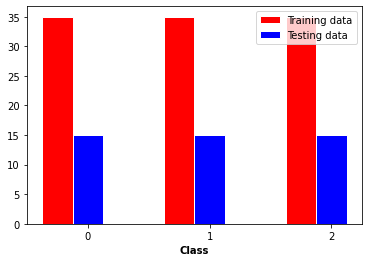

In [ ]:
plot_train_iris = y_train.value_counts().to_frame().reset_index()
plot_test_iris = y_test.value_counts().to_frame().reset_index()

# set width of bars
barWidth = 0.25
 
# set heights of bars
bars_iris_1 = plot_train_iris[0].values
bars_iris_2 = plot_test_iris[0].values
 
# Set position of bar on X axis
r1_iris = np.arange(len(bars_iris_1))
r2_iris = [x + barWidth for x in r1_iris]
 
# Make the plot
plt.bar(r1_iris, bars_iris_1, color='red', width=barWidth, edgecolor='white', label='Training data')
plt.bar(r2_iris, bars_iris_2, color='blue', width=barWidth, edgecolor='white', label='Testing data')
 
# Add xticks on the middle of the group bars
plt.xlabel('Class', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars_iris_1))], [0,1,2])
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9111111111111111

In [ ]:
confusion_metrix_iris = pd.DataFrame(columns = y.unique(),index=y.unique())
pred_test_df = pd.DataFrame()
pred_test_df['pred'] = y_pred
pred_test_df['test'] = y_test.values

# prediction in rows and actual in columns
for prediction in y.unique():
    for test_data in y.unique():
        confusion_metrix_iris.loc[prediction,test_data] = pred_test_df[(pred_test_df['pred']==prediction) & (pred_test_df['test']==test_data)].shape[0]

In [ ]:
#confusion metrix of iris dataset
confusion_metrix_iris

,0,1,2
0,15,0,0
1,0,14,3
2,0,1,12


In [ ]:
# OVERALL ACCURACY
accu = 0
for i in y.unique():
    accu += confusion_metrix_iris.loc[i,i]
class_accuracy = accu/X_test.shape[0]
print('OVERALL ACCURACY OF THE CLASSIFIER : ',class_accuracy)

print('')

# CLASS WISE ACCURACY
for i in y.unique():
    class_data = confusion_metrix_iris.loc[i,i]
    row_data = confusion_metrix_iris.loc[i,:].sum()
    column_data = confusion_metrix_iris.loc[:,i].sum()
    correct_prediction = confusion_metrix_iris.sum().sum()-(row_data+column_data-2*class_data)
    total_class_data = confusion_metrix_iris.sum().sum()
    print("ACCURACY OF CLASS ",i," IS : ",correct_prediction/total_class_data)

OVERALL ACCURACY OF THE CLASSIFIER :  0.9111111111111111

ACCURACY OF CLASS  0  IS :  1.0
ACCURACY OF CLASS  1  IS :  0.9111
ACCURACY OF CLASS  2  IS :  0.9111


In [ ]:
# from sklearn.metrics import roc_curve

# probability_iris_array = np.array(probability_iris)
# a = pd.get_dummies(y_test)

# for i in y.unique():
#     fpr,tpr,_ = roc_curve(a.loc[:,i],probability_iris_array[:,i])
#     plt.plot(fpr,tpr)

WINE DATASET

In [ ]:
from sklearn.datasets import load_wine

wine = load_wine()
X_wine = pd.DataFrame(wine['data'])
y_wine = pd.Series(wine['target'])

X_train_wine,X_test_wine,y_train_wine,y_test_wine = train_test_split(X_wine,y_wine,test_size=0.3,random_state=42,stratify=y_wine)

obj = NaiveBayes()
obj.fit(X_train_wine,y_train_wine)
y_pred_wine = obj.predict(X_test_wine)
probability_wine = obj.predict(X_test_wine,proba=True)
accuracy_score(y_test_wine,y_pred_wine)

1.0

In [ ]:
# Accuracy and confusion metrix of training dataset

y_pred_train = obj.predict(X_train_wine)
print('Accuracy on Wine Training Data Set : ',accuracy_score(y_train_wine,y_pred_train))

confusion_metrix_wine_train = pd.DataFrame(columns = y_wine.unique(),index=y_wine.unique())
pred_train_df_wine = pd.DataFrame()
pred_train_df_wine['pred'] = y_pred_train
pred_train_df_wine['test'] = y_train_wine.values

# prediction in rows and actual in columns
for prediction_wine in y_wine.unique():
    for test_data_wine in y_wine.unique():
        confusion_metrix_wine_train.loc[prediction_wine,test_data_wine] = pred_train_df_wine[(pred_train_df_wine['pred']==prediction_wine) & (pred_train_df_wine['test']==test_data_wine)].shape[0]

Accuracy on Wine Training Data Set :  0.967741935483871


In [ ]:
# Confusion metrix of wine training set
confusion_metrix_wine_train

,0,1,2
0,39,0,0
1,2,48,0
2,0,2,33


In [ ]:
obj.prior

{0: 0.33, 1: 0.4, 2: 0.27}

In [ ]:
# confusion metrix of testing dataset

confusion_metrix_wine = pd.DataFrame(columns = y_wine.unique(),index=y_wine.unique())
pred_test_df_wine = pd.DataFrame()
pred_test_df_wine['pred'] = y_pred_wine
pred_test_df_wine['test'] = y_test_wine.values

# prediction in rows and actual in columns
for prediction_wine in y_wine.unique():
    for test_data_wine in y_wine.unique():
        confusion_metrix_wine.loc[prediction_wine,test_data_wine] = pred_test_df_wine[(pred_test_df_wine['pred']==prediction_wine) & (pred_test_df_wine['test']==test_data_wine)].shape[0]

In [ ]:
# confusion metrix of wine dataset
confusion_metrix_wine

,0,1,2
0,18,0,0
1,0,21,0
2,0,0,15


In [ ]:
# OVERALL ACCURACY 
accu_wine = 0
for i in y_wine.unique():
    accu_wine += confusion_metrix_wine.loc[i,i]
class_accuracy_wine = accu_wine/X_test_wine.shape[0]
print('OVERALL ACCURACY OF THE CLASSIFIER : ',class_accuracy_wine)

print('')

for i in y_wine.unique():
    class_data = confusion_metrix_wine.loc[i,i]
    row_data = confusion_metrix_wine.loc[i,:].sum()
    column_data = confusion_metrix_wine.loc[:,i].sum()
    correct_prediction = confusion_metrix_wine.sum().sum()-(row_data+column_data-2*class_data)
    total_class_data = confusion_metrix_wine.sum().sum()
    print("ACCURACY OF CLASS ",i," IS : ",correct_prediction/total_class_data)

OVERALL ACCURACY OF THE CLASSIFIER :  1.0

ACCURACY OF CLASS  0  IS :  1.0
ACCURACY OF CLASS  1  IS :  1.0
ACCURACY OF CLASS  2  IS :  1.0


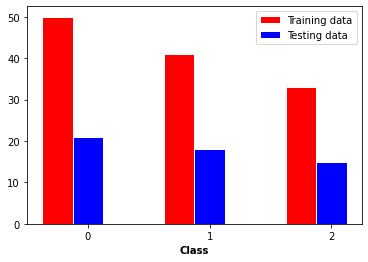

In [ ]:
plot_train_data = y_train_wine.value_counts().to_frame().reset_index()
plot_test_data = y_test_wine.value_counts().to_frame().reset_index()

# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = plot_train_data[0].values
bars2 = plot_test_data[0].values
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Training data')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Testing data')
 
# Add xticks on the middle of the group bars
plt.xlabel('Class', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], [0,1,2])
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [ ]:
# MEAN AND VARIENCE 

obj.mean

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,13.7305,1.94707,2.44976,17.1024,106.634,2.82854,2.94024,0.301707,1.85122,5.5678,1.05098,3.08854,1112.8
1,12.2424,1.9626,2.2328,20.524,95.14,2.2536,2.0468,0.3508,1.7122,2.9608,1.05892,2.8022,531.26
2,13.0745,3.20091,2.45424,21.5606,99.2727,1.68758,0.787576,0.446364,1.13879,7.36273,0.67303,1.69061,624.394


In [ ]:
obj.var

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.202951,0.395762,0.0605975,7.29536,116.281,0.114881,0.137627,0.00539465,0.146386,1.48304,0.0126625,0.108866,39725.7
1,0.270046,1.10784,0.0788842,10.5854,347.6,0.297211,0.366682,0.0123194,0.359241,0.750035,0.0396852,0.228521,25756.2
2,0.261655,0.879136,0.0318062,4.78421,102.865,0.147394,0.10234,0.0145322,0.212774,5.87019,0.0139726,0.0849269,13563.3


WINE DATASET WITH PRIOR 40-40-20

In [ ]:
# Accuracy and confusion metrix of testing dataset

obj1 = NaiveBayes()
obj1.fit(X_train_wine,y_train_wine.reset_index(drop=True),prior={0:0.40,1:0.40,2:0.20})
y_pred_wine1 = obj1.predict(X_test_wine)
probability_wine1 = obj1.predict(X_test_wine,proba=True)
print(accuracy_score(y_test_wine,y_pred_wine1))

confusion_metrix_wine1 = pd.DataFrame(columns = y_wine.unique(),index=y_wine.unique())
pred_test_df_wine1 = pd.DataFrame()
pred_test_df_wine1['pred'] = y_pred_wine1
pred_test_df_wine1['test'] = y_test_wine.values

# prediction in rows and actual in columns
for prediction_wine in y_wine.unique():
    for test_data_wine in y_wine.unique():
        confusion_metrix_wine1.loc[prediction_wine,test_data_wine] = pred_test_df_wine1[(pred_test_df_wine1['pred']==prediction_wine) & (pred_test_df_wine1['test']==test_data_wine)].shape[0]

0.9814814814814815


In [ ]:
# confusion metrix for testing dataset
confusion_metrix_wine1

,0,1,2
0,18,1,0
1,0,20,0
2,0,0,15


In [ ]:
# OVERALL ACCURACY 
accu_wine1 = 0
for i in y_wine.unique():
    accu_wine1 += confusion_metrix_wine.loc[i,i]
class_accuracy_wine1 = accu_wine1/X_test_wine.shape[0]
print('OVERALL ACCURACY OF THE CLASSIFIER : ',class_accuracy_wine1)

print('')

for i in y_wine.unique():
    class_data = confusion_metrix_wine1.loc[i,i]
    row_data = confusion_metrix_wine1.loc[i,:].sum()
    column_data = confusion_metrix_wine1.loc[:,i].sum()
    correct_prediction = confusion_metrix_wine1.sum().sum()-(row_data+column_data-2*class_data)
    total_class_data = confusion_metrix_wine1.sum().sum()
    print("ACCURACY OF CLASS ",i," IS : ",correct_prediction/total_class_data)

OVERALL ACCURACY OF THE CLASSIFIER :  1.0

ACCURACY OF CLASS  0  IS :  0.9814814814814815
ACCURACY OF CLASS  1  IS :  0.9814814814814815
ACCURACY OF CLASS  2  IS :  1.0


In [ ]:
# Accuracy and confusion metrix of training dataset

y_pred_train442 = obj1.predict(X_train_wine)
print(accuracy_score(y_train_wine,y_pred_train442))

confusion_metrix_wine442 = pd.DataFrame(columns = y_wine.unique(),index=y_wine.unique())
pred_test_df_wine442 = pd.DataFrame()
pred_test_df_wine442['pred'] = y_pred_train442
pred_test_df_wine442['test'] = y_train_wine.values

# prediction in rows and actual in columns
for prediction_wine in y_wine.unique():
    for test_data_wine in y_wine.unique():
        confusion_metrix_wine442.loc[prediction_wine,test_data_wine] = pred_test_df_wine442[(pred_test_df_wine442['pred']==prediction_wine) & (pred_test_df_wine442['test']==test_data_wine)].shape[0]

0.967741935483871


In [ ]:
# confusion metrix for training dataset
confusion_metrix_wine442

,0,1,2
0,39,0,0
1,2,48,0
2,0,2,33


WINE DATASET WITH PRIOR 80-80-10

In [ ]:
# Accuracy and confusion metrix of Testing Dataset

obj2 = NaiveBayes()
obj2.fit(X_train_wine,y_train_wine.reset_index(drop=True),prior={0:0.80,1:0.10,2:0.10})
y_pred_wine2 = obj2.predict(X_test_wine)
probability_wine2 = obj2.predict(X_test_wine,proba=True)
print('Accuracy Score of Testing Dataset : ',accuracy_score(y_test_wine,y_pred_wine2))

confusion_metrix_wine2 = pd.DataFrame(columns = y_wine.unique(),index=y_wine.unique())
pred_test_df_wine2 = pd.DataFrame()
pred_test_df_wine2['pred'] = y_pred_wine2
pred_test_df_wine2['test'] = y_test_wine.values

# prediction in rows and actual in columns
for prediction_wine in y_wine.unique():
    for test_data_wine in y_wine.unique():
        confusion_metrix_wine2.loc[prediction_wine,test_data_wine] = pred_test_df_wine2[(pred_test_df_wine2['pred']==prediction_wine) & (pred_test_df_wine2['test']==test_data_wine)].shape[0]

Accuracy Score of Testing Dataset :  0.9814814814814815


In [ ]:
# confusion metrix of testing dataset
confusion_metrix_wine2

,0,1,2
0,18,1,0
1,0,20,0
2,0,0,15


In [ ]:
# OVERALL ACCURACY 

accu_wine2 = 0
for i in y_wine.unique():
    accu_wine2 += confusion_metrix_wine2.loc[i,i]
class_accuracy_wine2 = accu_wine2/X_test_wine.shape[0]
print('OVERALL ACCURACY OF THE CLASSIFIER : ',class_accuracy_wine2)

print('')

for i in y_wine.unique():
    class_data = confusion_metrix_wine2.loc[i,i]
    row_data = confusion_metrix_wine2.loc[i,:].sum()
    column_data = confusion_metrix_wine2.loc[:,i].sum()
    correct_prediction = confusion_metrix_wine2.sum().sum()-(row_data+column_data-2*class_data)
    total_class_data = confusion_metrix_wine2.sum().sum()
    print("ACCURACY OF CLASS ",i," IS : ",correct_prediction/total_class_data)

OVERALL ACCURACY OF THE CLASSIFIER :  0.9814814814814815

ACCURACY OF CLASS  0  IS :  0.9814814814814815
ACCURACY OF CLASS  1  IS :  0.9814814814814815
ACCURACY OF CLASS  2  IS :  1.0


In [ ]:
# Accuracy and confusion metrix of training dataset

y_pred_train811 = obj2.predict(X_train_wine)
print(accuracy_score(y_train_wine,y_pred_train811))

confusion_metrix_wine811 = pd.DataFrame(columns = y_wine.unique(),index=y_wine.unique())
pred_test_df_wine811 = pd.DataFrame()
pred_test_df_wine811['pred'] = y_pred_train811
pred_test_df_wine811['test'] = y_train_wine.values

# prediction in rows and actual in columns
for prediction_wine in y_wine.unique():
    for test_data_wine in y_wine.unique():
        confusion_metrix_wine811.loc[prediction_wine,test_data_wine] = pred_test_df_wine811[(pred_test_df_wine811['pred']==prediction_wine) & (pred_test_df_wine811['test']==test_data_wine)].shape[0]

0.9758064516129032


In [ ]:
# Confusion metrix of Training Dataset
confusion_metrix_wine811

,0,1,2
0,41,0,0
1,0,47,0
2,0,3,33
